In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [3]:
 #What are the top 5 zipcodes for 911 calls? 
    
x=df['zip'].value_counts()
x.head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [4]:
#** What are the top 5 townships (twp) for 911 calls? **

x=df['twp'].value_counts()
x.head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [5]:
#** Take a look at the 'title' column, how many unique title codes are there? **

df['title'].nunique()

110

In [6]:
#** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

#*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *


def x(y):
    
    z= y.split(':')
    return z[0]


df['column']=df['title'].apply(x)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [7]:
#** What is the most common Reason for a 911 call based off of this new column? **

df['column'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: column, dtype: int64

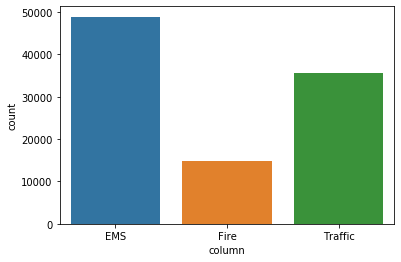

In [8]:
#** Now use seaborn to create a countplot of 911 calls by Reason. **

sns.countplot(x='column',data=df)

In [9]:
#** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

x=df['timeStamp'].dtypes
type(x)

numpy.dtype

In [10]:
x=df['timeStamp']
x                      #Notice the dtype

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [11]:
#** You should have seen that these timestamps are still strings. Use pd.to_datetime to convert the column from strings to DateTime objects. **

df['timeStamp']=pd.to_datetime(df['timeStamp'])                                 #Notice the dtype

In [12]:

df['Hour']=df['timeStamp'].apply(lambda time: time.hour)

In [13]:


df['Month']=df['timeStamp'].apply(lambda time: time.month)

In [14]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [15]:
time.day

10

In [16]:
time.dayofweek


3

In [17]:
time.year

2015

In [18]:
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

#mapping on the each day

df['Day of Week']=df['Day of Week'].map(dmap)


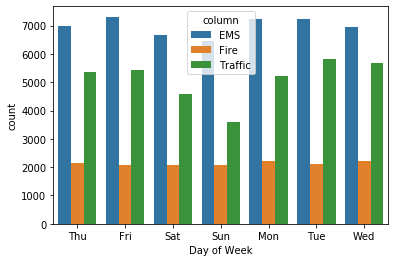

In [43]:
#** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

sns.countplot(x='Day of Week',hue='column',data=df)


In [20]:
 df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

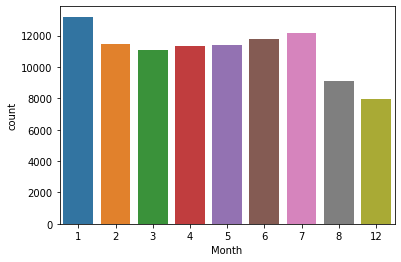

In [21]:
sns.countplot(x='Month',data=df)

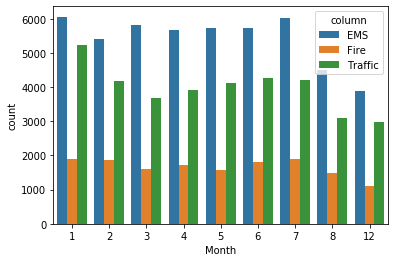

In [22]:
#Now do the same for Month:

sns.countplot(x='Month',data=df,hue='column')

In [23]:
#** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

byMonth=df.groupby('Month')

x=byMonth.count()

y=x

x.head() #we have created a head of the dataframe

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


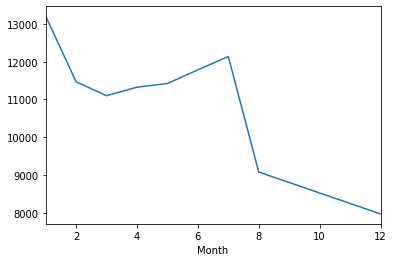

In [24]:
x['lng'].plot()

In [25]:
#** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.


x.reset_index(inplace=True)



In [26]:
y

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


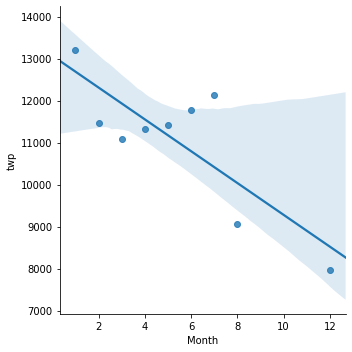

In [27]:
sns.lmplot(x='Month',y='twp',data=y)

In [28]:
y

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [29]:
#*Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. *

df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [109]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


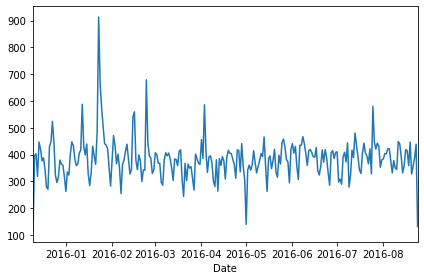

In [30]:
#** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**


df.groupby('Date').count()['lat'].plot()

plt.tight_layout()

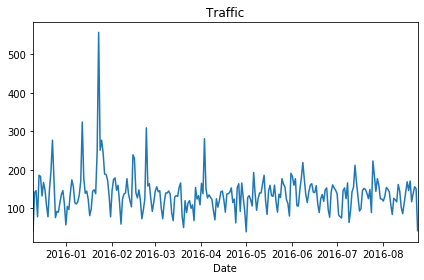

In [31]:
#** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

df[df['column']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

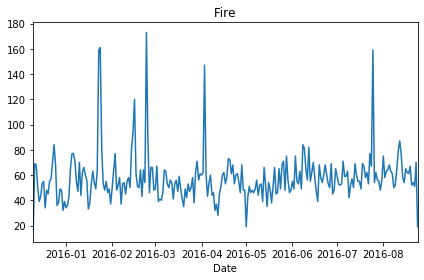

In [32]:
df[df['column']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

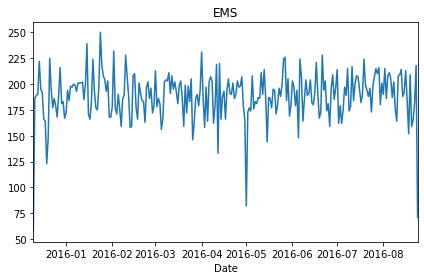

In [33]:
df[df['column']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

In [41]:
#** Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. Reference the solutions if you get stuck on this!**

x=df.pivot_table(index='Day of Week',columns='Hour',values='lat')
x

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,40.169621,40.157687,40.164340,40.160398,40.176780,40.174464,40.173802,40.156445,40.156771,40.161332,...,40.161011,40.151510,40.153237,40.156842,40.154495,40.155973,40.160767,40.162000,40.162012,40.166369
Mon,40.162162,40.161162,40.154063,40.174832,40.176374,40.175983,40.169440,40.160994,40.158522,40.160310,...,40.156284,40.156798,40.157361,40.155825,40.152469,40.153197,40.164290,40.157355,40.163505,40.159322
Sat,40.165790,40.165149,40.141154,40.148065,40.169937,40.177790,40.165542,40.162556,40.162658,40.170433,...,40.158426,40.160975,40.156457,40.153198,40.158696,40.160689,40.162264,40.164119,40.164187,40.165373
Sun,40.159093,40.155310,40.172051,40.159717,40.166284,40.159375,40.158364,40.158295,40.158953,40.165268,...,40.159051,40.166048,40.162271,40.167646,40.157766,40.157333,40.170696,40.162224,40.169060,40.164085
Thu,40.169482,40.163608,40.159372,40.171503,40.155952,40.161442,40.169035,40.157636,40.155030,40.148767,...,40.162824,40.152389,40.158809,40.164677,40.158404,40.162961,40.167278,40.163672,40.163334,40.155144
Tue,40.152128,40.153148,40.159789,40.165538,40.168159,40.161501,40.169410,40.164229,40.158545,40.154270,...,40.149995,40.154025,40.159972,40.157298,40.155406,40.160462,40.174660,40.168725,40.163557,40.162079
Wed,40.156905,40.165360,40.169074,40.169320,40.171085,40.162169,40.166772,40.157906,40.164154,40.158328,...,40.163060,40.159714,40.156123,40.153773,40.158612,40.151023,40.162469,40.168566,40.165110,40.163565


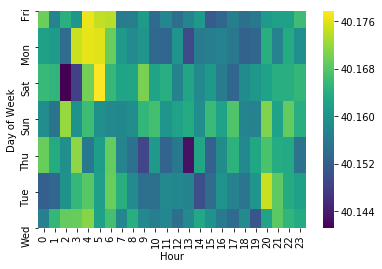

In [42]:
#** Now create a HeatMap using this new DataFrame. **

sns.heatmap(x,cmap='viridis')

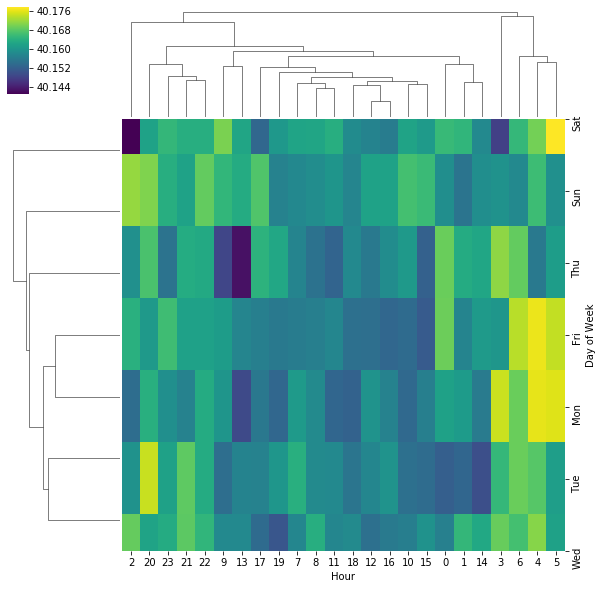

In [44]:
#** Now create a clustermap using this DataFrame. **

sns.clustermap(x,cmap='viridis')

In [45]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,column,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [49]:
#** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

x=df.pivot_table(index='Day of Week',columns='Month',values='zip')
x

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,19229.686636,19239.538179,19240.176426,19245.171021,19238.795878,19234.127362,19234.964660,19224.991986,19238.952539
Mon,19247.960159,19226.724367,19253.350440,19227.434690,19241.321267,19239.797423,19241.076714,19228.661854,19230.921889
Sat,19253.291394,19247.526613,19239.082883,19234.952381,19236.973123,19251.948462,19238.774386,19241.828452,19246.558894
Sun,19245.984384,19256.565628,19228.637577,19228.654141,19229.665856,19255.010563,19231.454861,19228.846241,19242.037267
Thu,19249.888248,19240.458333,19234.010922,19226.398994,19221.357606,19274.024444,19245.565999,19246.105010,19239.366972
Tue,19241.272513,19213.759609,19237.652702,19236.702789,19238.695783,19232.807295,19227.437629,19221.927208,19229.426740
Wed,19241.441672,19230.069477,19239.170238,19245.173591,19236.414074,19235.326644,19230.085106,19225.150090,19220.522664


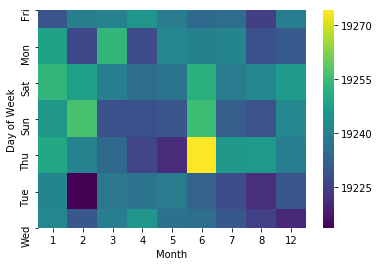

In [50]:
sns.heatmap(x,cmap='viridis')

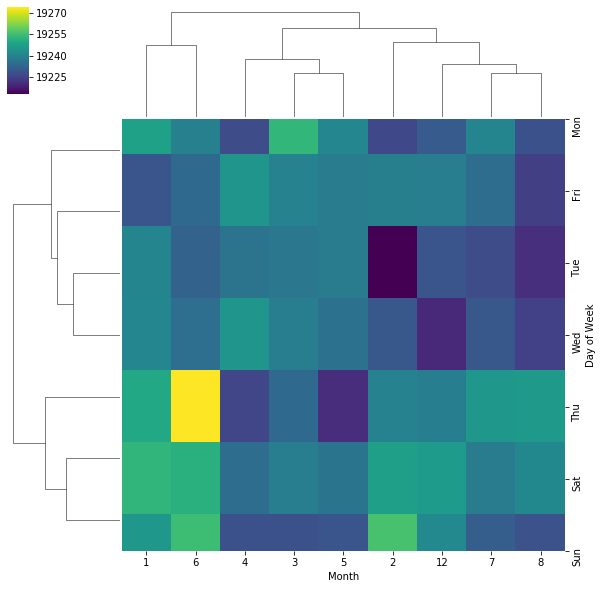

In [51]:
sns.clustermap(x,cmap='viridis')